In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [138]:
iris = load_iris();
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species']=iris.target
data['species']=data['species'].replace(dict(enumerate(iris.target_names)))
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [139]:
X = iris.data[:, [0, 1]]
k = 3
print(X)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [140]:
np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], k, False)]
print(centroids)

[[6.1 2.8]
 [5.7 3.8]
 [7.7 2.6]]


In [141]:
def closest_centroids(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis = 2))
    return np.argmin(distances, axis = 0)

def compute_centroid(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

In [142]:
for _ in range(100):
    labels = closest_centroids(X, centroids)
    new_centroids = compute_centroid(X, labels, k)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

In [143]:
print("Final Centroid:\n ", centroids)

Final Centroid:
  [[5.8        2.7       ]
 [5.00392157 3.40980392]
 [6.82391304 3.07826087]]


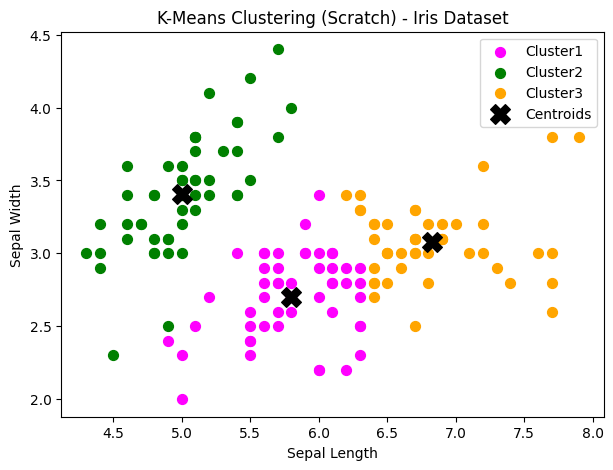

In [144]:
plt.figure(figsize=(7, 5))
colors = ['magenta', 'green', 'orange']
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, color=colors[i], label=f'Cluster{i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='X', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering (Scratch) - Iris Dataset')
plt.legend()
plt.show()

In [145]:
import math
import random
import pandas
import matplotlib.pyplot as plt

In [146]:
def distance(p1, p2):
    total = 0
    for i in range(len(p1)):
        total += (p1[i] - p2[i]) ** 2
    return math.sqrt(total)


In [147]:
def mean(points):
    n = len(points)
    dims = len(points[0])
    result = []
    for i in range(dims):
        s = 0
        for j in range(n):
            s += points[j][i]
        result.append(s/n)
    return result

In [148]:
def kmeans(data, k, max_iters = 100):
    centroids = random.sample(data, k)
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = []
            for c in centroids:
                d = distance(point, c)
                distances.append(d)
            min_index = distances.index(min(distances))
            clusters[min_index].append(point)
        new_centroids = []
        for cluster in clusters:
            if cluster:
                new_c = mean(cluster)
            else:
                new_c = random.choice(data)
            new_centroids.append(new_c)

        if new_centroids == centroids:
            break
        centroids = new_centroids
    return centroids, clusters
        

In [149]:
df = pd.read_csv('data.csv')
print(df)
data = df.values.tolist()
print(data)

     1     2
0  1.5   1.8
1  5.0   8.0
2  8.0   8.0
3  1.0   0.6
4  9.0  11.0
[[1.5, 1.8], [5.0, 8.0], [8.0, 8.0], [1.0, 0.6], [9.0, 11.0]]


In [150]:
final_centroids, final_clusters = kmeans(data, k=3)

In [151]:
print("Final Centroids: ")
for c in final_centroids:
    f_c = [round(val, 2) for val in c]
    print(f_c)

Final Centroids: 
[1.25, 1.2]
[8.5, 9.5]
[5.0, 8.0]


In [152]:
print("\n Cluster: ")
for i, cluster in enumerate(final_clusters):
    print("Cluster: ", i+1, ":", cluster)


 Cluster: 
Cluster:  1 : [[1.5, 1.8], [1.0, 0.6]]
Cluster:  2 : [[8.0, 8.0], [9.0, 11.0]]
Cluster:  3 : [[5.0, 8.0]]


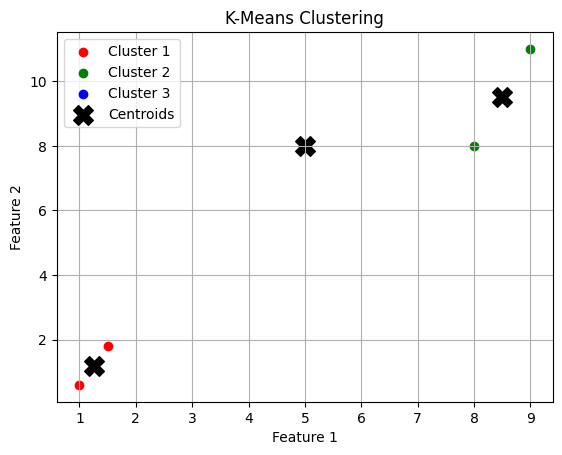

In [153]:
# --- Plotting the Clusters ---
colors = ['red', 'green', 'blue']

for i, cluster in enumerate(final_clusters):
    x_vals = [p[0] for p in cluster]
    y_vals = [p[1] for p in cluster]
    plt.scatter(x_vals, y_vals, color=colors[i], label=f'Cluster {i+1}')

# Plot centroids
cent_x = [c[0] for c in final_centroids]
cent_y = [c[1] for c in final_centroids]
plt.scatter(cent_x, cent_y, color='black', marker='X', s=200, label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()